SGD python code
  - 확률적 경사하강법
  - 손실함수의 최소가 되는 값을 찾는 바법
  - 손실을 적용할수 있는 모델로 선형회귀인 LinearRegression 을 이용

클래스 생성
  - 생성자를 통해 필요한 하이퍼 파라메터를 적용

In [226]:
import numpy as np
from tqdm import tqdm
class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size = 1, 
                 weight_decay=0.9, shuffle = True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs

        self._cost_history = []

        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle

    def gradient(self, X, y, theta):  # 경사하강법으로 기울기를 계산  
        temp = X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)        
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):  # 학습
        self._new_X = np.array(X)  # X 데이터 할당
        y = y.reshape(-1, 1)

        if self.fit_intercept:    # intercept 추가 여부  바이어스 사용 여부
            # 1로만 구성된 상수항을 모든 데이터를 추가
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                    (intercept_vector, self._new_X), axis=1)
        
        # elf._new_X.shape  (배치사이트, 속성의 개수)
        theta_init = np.random.normal(0, 1, self._new_X.shape[1]) # 가중치 초기화  평균이0이고 std 1인 정규분포
        # weight값 초기화
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
                        self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in tqdm(range(self._epochs)): # 지정된 epoch의 값만큼 학습 실행            
            X_copy = np.copy(self._new_X)            
            y_copy = np.copy(y)                        
            if self._is_SGD:   # stochastic 적용 여부
                # x와 y를 hstack을 해서 합친다음 섞고 분리한다.                      
                y_copy = y_copy.reshape(-1,1)
                temp = np.hstack((X_copy,y_copy))                
                np.random.shuffle( temp )                
                X_copy = temp[:,:-1]
                y_copy = temp[:,1].reshape(-1,1)         
                # np.random.shuffle( X_copy )

            batch = len(X_copy) // self._batch_size 
            # batch 사이즈를 기준으로 전체데이터를 나눔

            for batch_count  in range(batch):
                X_batch = np.copy(   # BATCH 사이즈를 기준으로 데이터를 slice
                            X_copy[batch_count * self._batch_size : (batch_count+1) * self._batch_size])
                
                y_batch = np.copy(   # BATCH 사이즈를 기준으로 데이터를 slice
                            y_copy[batch_count * self._batch_size : (batch_count+1) * self._batch_size])
                
                gradient = self.gradient(X_batch  , y_batch, theta).flatten()                                
                theta = theta - self._eta0 * gradient

            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
    
    def cost(self, h, y): # 비용함수 
        return 1/(2*len(y)) * np.sum((h-y).flatten() ** 2)

    def hypothesis_function(self, X, theta):  # 가설함수(값을 예측)        
        return X.dot(theta).reshape(-1, 1)
    

    def predict(self, X):
        test_X = np.array(X)

        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate(
                    (intercept_vector, test_X), axis=1)

            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef

        return test_X.dot(weights)

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept

    @property
    def weights_history(self):
        return np.array(self._w_history)

    @property
    def cost_history(self):
        return self._cost_history

In [227]:
import pandas as pd
train_df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/train.csv')
X = train_df['x'].to_numpy().reshape(-1,1)
y = train_df['y'].to_numpy()
X.shape, y.shape

((700, 1), (700,))

In [228]:
gd_lr = LinearRegressionGD(eta0=0.001,epochs=10000,batch_size=1,shuffle=False) #경사하강법
bgd_lr = LinearRegressionGD(eta0=0.001,epochs=10000,batch_size=len(X),shuffle=False) #배치 경사하강법
sgd_lr = LinearRegressionGD(eta0=0.001,epochs=10000,batch_size=1,shuffle=True) #확률적 경사하강법
msgd_lr = LinearRegressionGD(eta0=0.001,epochs=10000,batch_size=100,shuffle=True) #미니배치 확률적 경사하강법

In [229]:
gd_lr.fit(X,y)
bgd_lr.fit(X,y)
sgd_lr.fit(X,y)
msgd_lr.fit(X,y)

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-226-1e7ee7175845>:68: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self._eta0 * gradient
100%|██████████| 10000/10000 [00:11<00:00, 883.64it/s]


In [ ]:
sgd_lr.cost_history

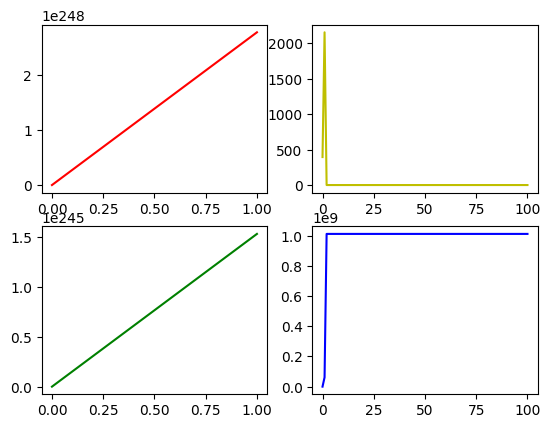

In [233]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.plot(range(len(gd_lr.cost_history)),gd_lr.cost_history,c='r')
plt.subplot(2,2,2)
plt.plot(range(len(bgd_lr.cost_history)),bgd_lr.cost_history,c='y')
plt.subplot(2,2,3)
plt.plot(range(len(sgd_lr.cost_history)),sgd_lr.cost_history,c='g')
plt.subplot(2,2,4)
plt.plot(range(len(msgd_lr.cost_history)),msgd_lr.cost_history,c='b')